#<font color='Green'>**BOOK RECOMMENDATION SYSTEM**

# <font color='green'> **Problem Statement**



In [ ]:
#Importing modules
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

# <font color='green'> **Content**
● Users:-

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers.
Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL-
values.


● Books:-

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the
dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-
Of-Publication, Publisher), obtained from Amazon Web Services. Note that in case of several
authors, only the first is provided. URLs linking to cover images are also given, appearing in three
different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These
URLs point to the Amazon web site.

● Ratings:-

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a
scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

#<font color='green'>**Load The Dataset**

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Ratings.csv to Ratings.csv


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Users.csv to Users.csv


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Books.csv to Books.csv


In [ ]:
users = pd.read_csv('Users.csv')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
books = pd.read_csv('Books.csv')
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
ratings = pd.read_csv('Ratings.csv')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


###<font color='green'>**To Check The Dimensions of Dataset**

In [ ]:
# dimension of dataset
print(f'''\t  Book_df shape is {books.shape}
          Ratings_df shape is {ratings.shape}
          Users_df shape is {users.shape}''')

	  Book_df shape is (271360, 8)
          Ratings_df shape is (1149780, 3)
          Users_df shape is (278858, 3)


###<font color='green'>**1] Users_Dataset**

In [ ]:
def missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()


# Explanation of each part:

Calculating Missing Values:

mis_val = df.isnull().sum(): Counts the total number of missing values in each column.
Calculating Percentage of Missing Values:

mis_val_percent = round(df.isnull().mean().mul(100), 2): Calculates the percentage of missing values in each column, rounded to two decimal places.
Creating a DataFrame:

mz_table = pd.concat([mis_val, mis_val_percent], axis=1): Combines the two results (total missing values and percentage of missing values) into a DataFrame using pd.concat.
Column Renaming:

mz_table = mz_table.rename(columns={df.index.name: 'col_name', 0: 'Missing Values', 1: '% of Total Values'}): Renames the columns for better readability.
Adding Data Type Information:

mz_table['Data_type'] = df.dtypes: Adds a new column to the DataFrame indicating the data type of each column.
Sorting the DataFrame:

mz_table = mz_table.sort_values('% of Total Values', ascending=False): Sorts the DataFrame based on the percentage of missing values in descending order.
Resetting Index:

return mz_table.reset_index(): Resets the index of the DataFrame for a clean presentation and returns the final result.

In [ ]:
missing_values(users)

,index,Missing Values,% of Total Values,Data_type
0,Age,110762,39.72,float64
1,User-ID,0,0.00,int64
2,Location,0,0.00,object


<font color='green'>**Age have around 39% missing values.**





<font color='green'>**◼ Age Distribution**

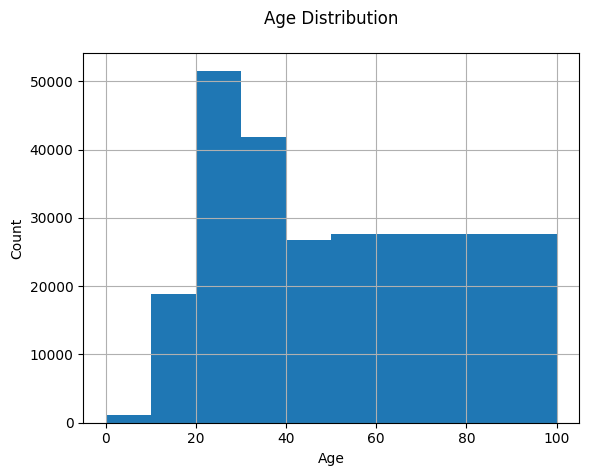

In [ ]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Histogram Creation:

users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100]): This line is using the hist method on the Age column of the users DataFrame to create a histogram. The bins parameter specifies the bin edges for the histogram. In this case, the histogram will have bins for age ranges [0-10), [10-20), [20-30), [30-40), [40-50), and [50-100).
Title, X-axis, and Y-axis Labels:

plt.title('Age Distribution\n'): Sets the title of the plot to 'Age Distribution'. The \n is used to insert a newline character for better formatting.
plt.xlabel('Age'): Sets the label for the x-axis as 'Age'.
plt.ylabel('Count'): Sets the label for the y-axis as 'Count'.
Display the Plot:

plt.show(): Displays the plot.

<font color='green'>**The most active users are among those in their 20–30s.**

<font color='green'>**◼ Let's check for outliers in age column**

Text(0.5, 1.0, 'Find outlier data in Age column')

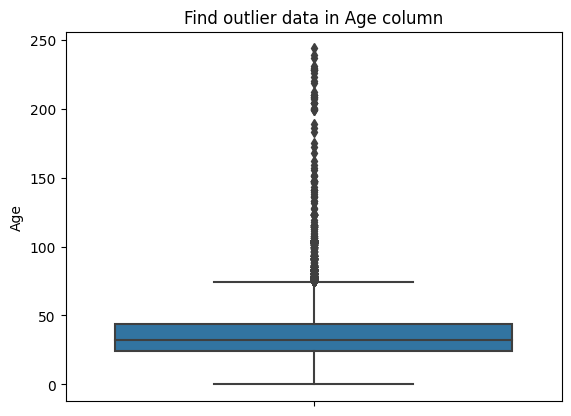

In [ ]:
sns.boxplot(y='Age', data=users)
plt.title('Find outlier data in Age column')

# Seaborn Boxplot:

sns.boxplot(y='Age', data=users): This line creates a boxplot using Seaborn. It specifies the 'Age' column as the variable to be plotted on the y-axis (y='Age'), and the data source is the users DataFrame (data=users). The boxplot is a way to visualize the distribution of values, including the median, quartiles, and potential outliers.
Matplotlib Title:

plt.title('Find outlier data in Age column'): Sets the title of the plot to 'Find outlier data in Age column' using Matplotlib.
Display the Plot:

The code assumes that you have already imported Matplotlib and Seaborn. After creating the boxplot and setting the title, you might use plt.show() to display the plot.

In [ ]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

# Explanation:

users.Age.unique():

users.Age: Accesses the 'Age' column of the users DataFrame.
.unique(): Retrieves the unique values in the 'Age' column.
sorted(...):

sorted(...): Takes an iterable (in this case, the unique age values) and returns a sorted list.
print(...):

print(...): Prints the sorted list of unique age values to the console.

<font color='green'>Age : 244.
We have Outlier data in Age

<font color='green'>**◼ Let's find our unique value in Location column**

In [ ]:
users.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [ ]:
users.Location.nunique()

57339

<font color='green'>**57339 unique Value it's really hard to understand<br>
So let's create column Country.**

In [ ]:
for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

# for i in users::

This is a loop that iterates through the columns of the users DataFrame. However, the loop variable i is not used within the loop, so it essentially iterates through the column names without using them.
users['Country'] = users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$'):

users['Country']: Creates a new column named 'Country' in the users DataFrame.
users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$'): Extracts country information from the 'Location' column using a regular expression.
Regular Expression (r'\,+\s?(\w*\s?\w*)\"*$'):

\,+\s?: Matches one or more commas followed by an optional space.
(\w*\s?\w*): Captures alphanumeric characters with an optional space in between. This is the part capturing the country name.
\"*$: Matches zero or more double quote characters at the end of the string.
Overall Purpose:

The loop iterates through the columns (though i is not used) and assigns the extracted country information to a new 'Country' column in the users DataFrame.

In [ ]:
users.Country.nunique()

529

In [ ]:
#drop location column
users.drop('Location',axis=1,inplace=True)

In [ ]:
users.head(2)

,User-ID,Age,Country
0,1,NaN,usa
1,2,18.0,usa


In [ ]:
users.isnull().sum()

User-ID         0
Age        110762
Country       368
dtype: int64

In [ ]:
users['Country']=users['Country'].astype('str')

In [ ]:
a=list(users.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

# a = list(users.Country.unique()):

users.Country.unique(): Retrieves the unique values from the 'Country' column of the users DataFrame.
list(...): Converts the unique values to a list and assigns it to the variable a.
a = set(a):

set(a): Converts the list a to a set, which automatically removes duplicate values.
a = list(a):

Converts the set of unique country names back to a list and assigns it to the variable a.
List Comprehension to Remove None Values:

a = [x for x in a if x is not None]: Uses a list comprehension to create a new list containing only non-None values from the original list a.
Sorting the List:

a.sort(): Sorts the list of country names in ascending order.
print(a):

Prints the final sorted list of unique country names.

<font color='green'>**Some data has Misspellings Let's correct it.**

In [ ]:
users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

# Explanation:

users['Country'].replace(..., inplace=True):

This method is used to replace specific values in the 'Country' column of the users DataFrame.
inplace=True modifies the DataFrame in place, meaning it directly affects the original DataFrame without the need for reassignment.
Replacement Lists:

The first list contains the values that need to be replaced, and the second list contains the corresponding replacement values.
For example, '' is replaced with 'other', '01776' is replaced with 'usa', and so on.
Specific Replacements:

Some replacements seem to be correcting or standardizing entries, such as replacing various spellings of 'usa' with 'usa', standardizing 'australia' entries, and correcting 'united kingdom'.
Standardizing Country Names:

The replacement operation is standardizing the country names in the 'Country' column to a consistent format.
inplace=True:

Modifies the 'Country' column of the original DataFrame (users) in place, without the need for reassignment.

Text(0.5, 1.0, 'Count of users Country wise')

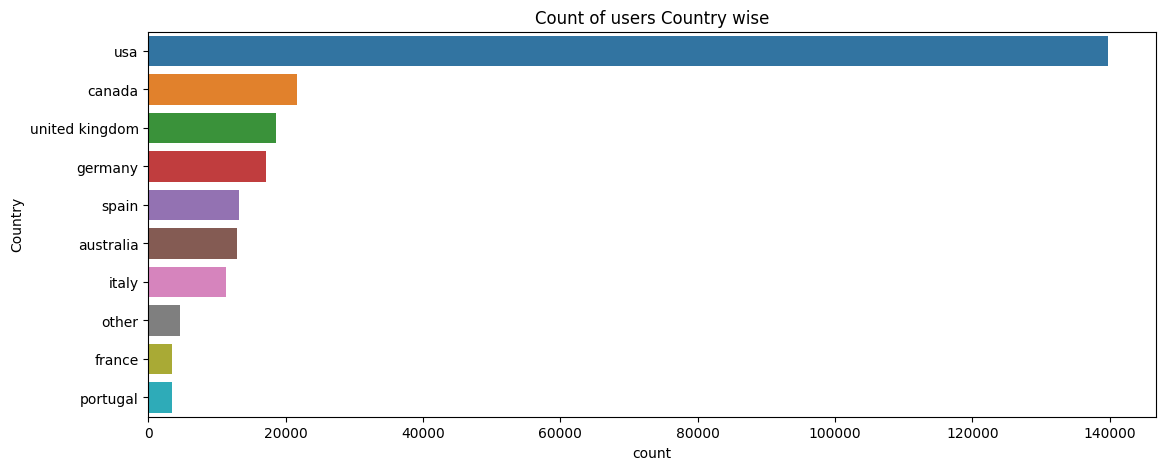

In [ ]:
plt.figure(figsize=(13,5))
sns.countplot(y='Country',data=users,order=pd.value_counts(users['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

# Explanation:

plt.figure(figsize=(13,5)):

plt.figure(figsize=(13,5)): Sets the size of the figure (plot) to be created. In this case, the figure size is set to 13 units in width and 5 units in height.
Seaborn Countplot:

sns.countplot(y='Country', data=users, order=pd.value_counts(users['Country']).iloc[:10].index): This line creates a countplot using Seaborn.

y='Country': Specifies the 'Country' column as the variable to be plotted on the y-axis.

data=users: Specifies the DataFrame (users) from which the data is to be drawn.

order=pd.value_counts(users['Country']).iloc[:10].index: Specifies the order of the bars based on the count of occurrences of each country. It orders the top 10 countries by count.

plt.title('Count of users Country wise'):

Sets the title of the plot to 'Count of users Country wise'.
Display the Plot:

The actual display of the plot is not included in the provided code snippet. Depending on the context, you might use plt.show() to display the plot.

<font color='green'>**We seen that thier is most number of users are from the USA**

<font color='green'>**◼ Let's treat outliers in users age.**

Text(0.5, 1.0, 'Age Distribution Plot')

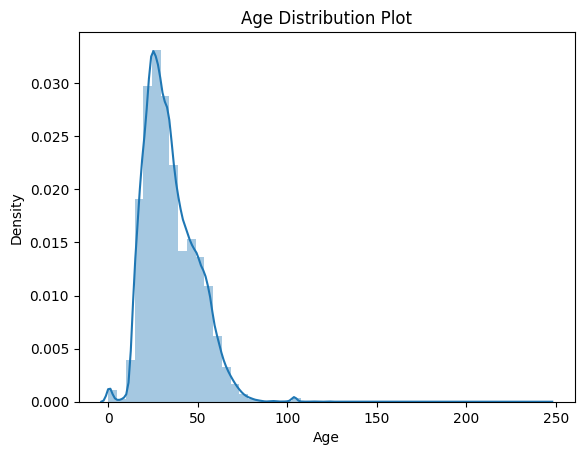

In [ ]:
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

# Inference
distribution is skewed to the right, it suggests that there are more younger users.

<font color='green'>**Age value's below 5 and above 100 do not make much sense for our book rating case...hence replacing these by NaNs**

In [ ]:
# outlier data became NaN
users.loc[(users.Age > 100) | (users.Age < 5), 'Age'] = np.nan

# Handling Outliers:

Values greater than 100 or less than 5 in the 'Age' column are often considered outliers or erroneous entries. By replacing them with NaN, the code might be addressing data quality issues.
Dealing with Invalid Ages:

Ages less than 5 or greater than 100 may be considered invalid in many contexts. This correction ensures that such values do not distort the analysis or modeling processes.
Imputation Consideration:

Replacing invalid ages with NaN could be a precursor to imputation strategies. Later in the data analysis process, missing age values could be imputed using appropriate techniques.
Improving Data Quality:

This operation contributes to improving the overall quality of the dataset by handling extreme or unrealistic age values.
Ensuring Meaningful Analysis:

Removing or marking unrealistic age values allows for a more meaningful and accurate analysis of age-related patterns in the dataset.

In [ ]:
users.isna().sum()

User-ID         0
Age        112010
Country         0
dtype: int64

<font color='green'> **Age has positive Skewness (right tail) so we can use median to fill Nan values, but for this we don't like to fill Nan value just for one range of age. To handle this we'll use country column to fill Nan**

In [ ]:
users['Age'] = users['Age'].fillna(users.groupby('Country')['Age'].transform('median'))

# Inference:

Imputing Missing Age Values:

The code is imputing missing values in the 'Age' column based on the median age of users in the same country. This strategy leverages the assumption that users from the same country may have similar age distributions.
Handling Missing Data:

By filling missing age values with country-specific medians, the code addresses potential gaps or missing data in the 'Age' column.

In [ ]:
users.isna().sum()

User-ID      0
Age        276
Country      0
dtype: int64

<font color='green'>**Still we have 276 Nan values let's fill them with mean**

In [ ]:
users['Age'].fillna(users.Age.mean(),inplace=True)

# Inference:

Imputing Missing Age Values with Mean:

The code is imputing missing values in the 'Age' column by replacing them with the mean age of the entire dataset.

Handling Missing Data:

This imputation strategy is a common approach when dealing with missing numerical data. It fills missing values with a central tendency measure (mean) of the available data.

In [ ]:
users.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

#<font color='green'>**2] Books_Dataset**

In [ ]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


<font color='green'>**◼ Now we extract top 10 Authors which have written the most books**

Text(0.5, 1.0, 'Top 10 Authors')

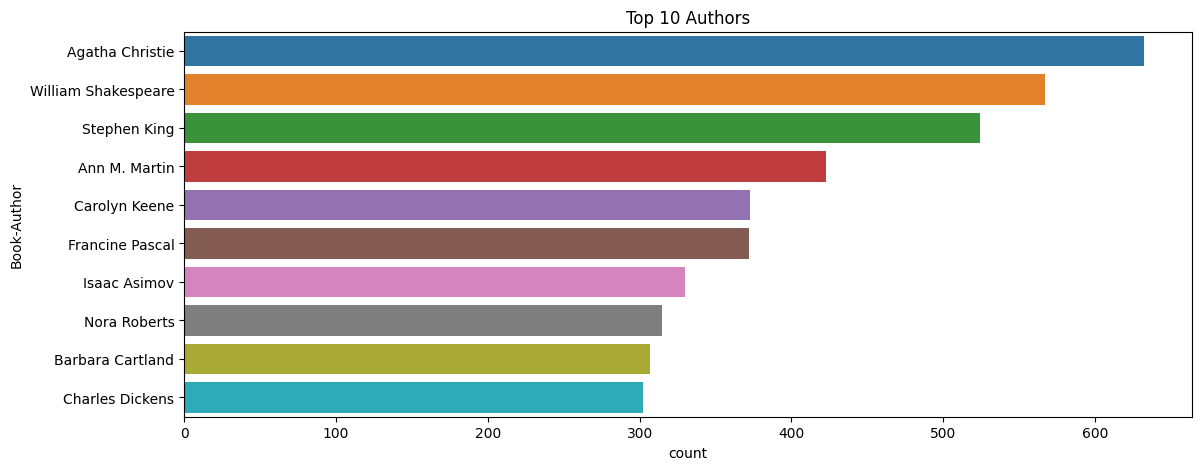

In [ ]:
plt.figure(figsize=(13,5))
sns.countplot(y='Book-Author',data=books,order=pd.value_counts(books['Book-Author']).iloc[:10].index)
plt.title('Top 10 Authors')

# Inferences:

Author Popularity:

The plot provides insight into the popularity or prolificacy of authors, as it highlights the top 10 authors with the most books in the dataset.

<font color='green'>**◼ Now we extract top 10 Publisher which have published the most books.**

Text(0.5, 1.0, 'Top 10 Publishers')

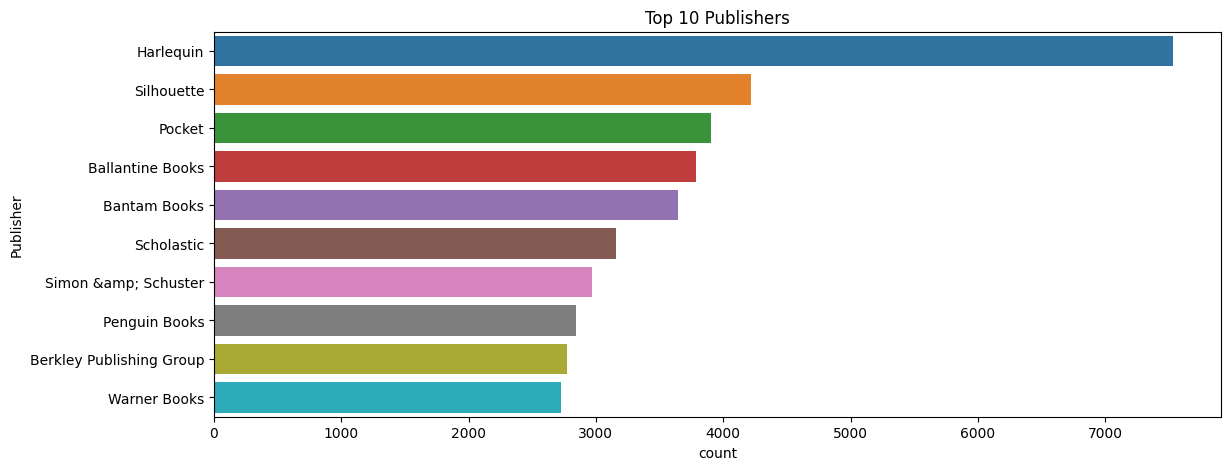

In [ ]:
plt.figure(figsize=(13,5))
sns.countplot(y='Publisher',data=books,order=pd.value_counts(books['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

# Inference:

Top 10 Publishers Distribution:

The code is visualizing the distribution of books published by the top 10 publishers. The bar heights in the plot represent the count of books associated with each publisher.

In [ ]:
books['Year-Of-Publication']=books['Year-Of-Publication'].astype('str')
a=list(books['Year-Of-Publication'].unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


In [ ]:
#investigating the rows having 'DK Publishing Inc' as yearOfPublication
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


<font color='green'>**As it can be seen from above that there are some incorrect entries in Year-Of-Publication field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as Year-Of-Publication in dataset due to some errors in csv file.**

In [ ]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#rechecking
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]
#corrections done

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
#investigating the rows having 'Gallimard' as yearOfPublication
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [ ]:
#making required corrections as above, keeping other fields intact
books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


books.loc[books.ISBN == '2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [ ]:
books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

print(sorted(books['Year-Of-Publication'].unique()))
#Now it can be seen that yearOfPublication has all values as integers

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


<font color='green'>**The value 0 for Year-Of_Publication is invalid and as this dataset was published in 2004, We have assumed that the years after 2006 to be
invalid and setting invalid years as NaN**

In [ ]:
books.loc[(books['Year-Of-Publication'] > 2006) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

#replacing NaNs with median value of Year-Of-Publication
books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].median()), inplace=True)

In [ ]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [ ]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [ ]:
#exploring 'publisher' column
books.loc[books.Publisher.isnull(),:]
#two NaNs

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


In [ ]:
#Filling Nan of Publisher with others
books.Publisher.fillna('other',inplace=True)

In [ ]:
#exploring 'Book-Author' column
books.loc[books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing


In [ ]:
#Filling Nan of Book-Author with others
books['Book-Author'].fillna('other',inplace=True)

In [ ]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

#<font color='green'>**3] Ratings_Dataset**

In [ ]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


<font color='green'>**Ratings dataset should have books only which exist in our books dataset**

In [ ]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings.shape,ratings_new.shape

((1149780, 3), (1031136, 3))

<font color='green'>**It can be seen that many rows having book ISBN not part of books dataset got dropped off.
<font color='green'>Ratings dataset should have ratings from users which exist in users dataset.**

In [ ]:
print("Shape of dataset before dropping",ratings_new.shape)
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]
print("shape of dataset after dropping",ratings_new.shape)

Shape of dataset before dropping (1031136, 3)
shape of dataset after dropping (1031136, 3)


<font color='green'>**It can be seen that no new user was there in ratings dataset.**

<font color='green'>**Let's see how the ratings are distributed**

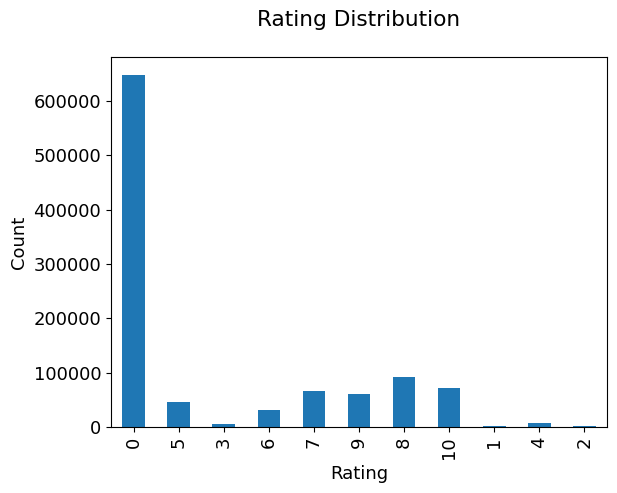

In [ ]:
plt.rc("font", size=13)
ratings_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

<font color='green'>**The ratings are very unevenly distributed, and the vast majority of ratings are 0 .As quoted in the description of the dataset - BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.Hence segragating implicit and explict ratings datasets.**

In [ ]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

In [ ]:
print('ratings_explicit dataset shape',ratings_explicit.shape)
print('ratings_implicit dataset',ratings_implicit.shape)

ratings_explicit dataset shape (383842, 3)
ratings_implicit dataset (647294, 3)


<Axes: xlabel='Book-Rating', ylabel='count'>

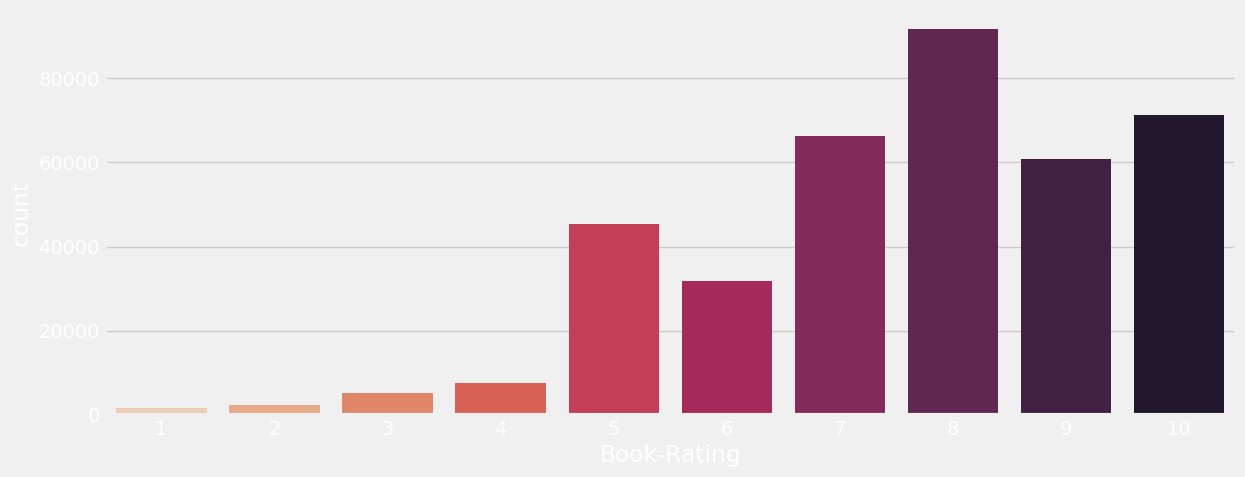

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 5))
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='rocket_r')

<font color='green'>**It can be observe that higher ratings are more common amongst users and rating 8 has been rated highest number of times**